In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data preparation

In [2]:
df_housing = pd.read_csv('train.csv')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_housing = df_housing.drop(columns=['Id'])

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
df_housing.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,34.00,59.00,69.0,80.00,96.0,107.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,3311.70,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,4.00,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,4.00,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1916.00,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.00,0.0,166.00,335.0,456.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,383.5,712.25,1065.5,1274.00,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.00,0.0,0.00,117.2,396.20,830.38,1474.0


### It looks like there are few outliers in the data which can be dropped, however since we do not have sufficient data, we would be handling this using standardization scaling technique later in the script

In [6]:
df_housing.select_dtypes(include=['object']).nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

### The categorical values are within the defined data map unique counts and we so we do not need any imputation

In [7]:
df_corr = df_housing.corr()

In [8]:
df_corr_cleaned = df_corr[(df_corr['SalePrice'] >= 0.25) | (df_corr['SalePrice'] <= -0.25)]
df_corr_cleaned = df_corr_cleaned[df_corr_cleaned.index]

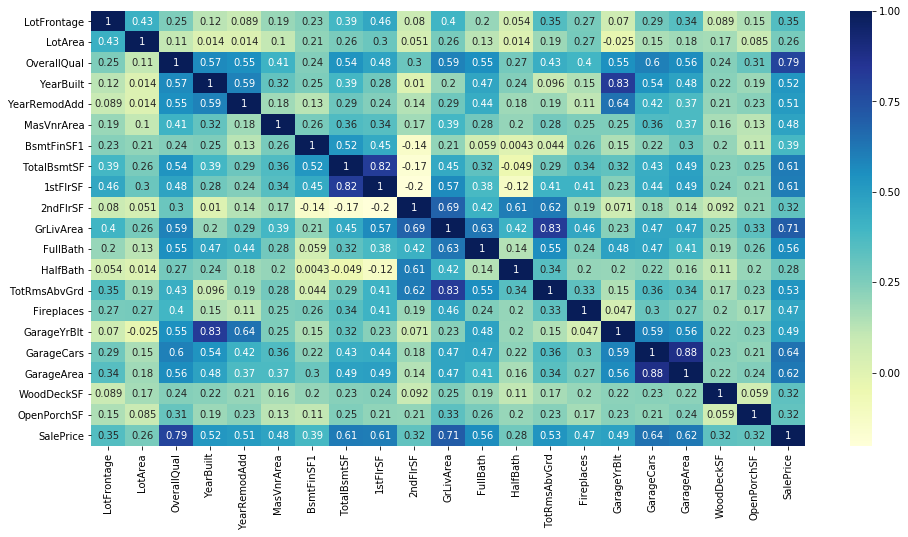

In [9]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_corr_cleaned, cmap="YlGnBu", annot=True)
plt.show()


### The number of variables were huge to view in a heatmap and so the above heatmap is filtered to show when correlation with target variable is either greater than 0.25 or less than -0.25. This gives a general overview of all the important variables.

In [10]:
df_housing_cat = df_housing.select_dtypes(include=['object'])
df_housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
cat_cols = list(df_housing_cat.columns)

In [12]:
cont_cols = list(df_housing.select_dtypes(exclude=['object']).columns)

In [13]:
df_housing[cont_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

### When looking at the float and int columns, I noticed there are 3 columns that have few null values.

In [14]:
df_housing['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

### The 3 columns are dependant on categorical variables and these look like valid responses. The 3 columns have been assigned a unique value of -1 in order to distinguish the value and still be corellated to the categorical column.

In [15]:
df_housing.loc[df_housing['LotFrontage'].isnull(), 'LotFrontage'] = -1

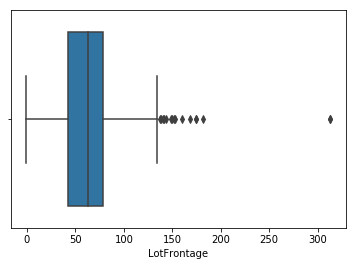

In [16]:
sns.boxplot(df_housing['LotFrontage'])

In [17]:
df_housing['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [18]:
df_housing.loc[df_housing['MasVnrArea'].isnull(), 'MasVnrArea'] = -1

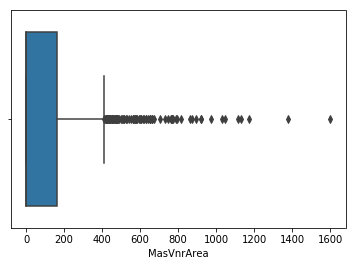

In [19]:
sns.boxplot(df_housing['MasVnrArea'])

In [20]:
df_housing['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [21]:
df_housing.loc[df_housing['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

In [22]:
df_housing[cont_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

### Creating dummies of categorical variable

In [23]:
df_modified = df_housing.copy()

In [24]:
housing_dummies = pd.get_dummies(df_housing_cat, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
# drop categorical variables 
df_modified = df_modified.drop(cat_cols, axis=1)

In [26]:
# concat dummy variables with X
df_modified = pd.concat([df_modified, housing_dummies], axis=1)
df_modified.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
df_modified[housing_dummies.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MSZoning_FV,1460.0,0.044521,0.206319,0.0,0.0,0.0,0.0,1.0
MSZoning_RH,1460.0,0.010959,0.104145,0.0,0.0,0.0,0.0,1.0
MSZoning_RL,1460.0,0.788356,0.408614,0.0,1.0,1.0,1.0,1.0
MSZoning_RM,1460.0,0.149315,0.356521,0.0,0.0,0.0,0.0,1.0
Street_Pave,1460.0,0.995890,0.063996,0.0,1.0,1.0,1.0,1.0
Alley_Pave,1460.0,0.028082,0.165264,0.0,0.0,0.0,0.0,1.0
LotShape_IR2,1460.0,0.028082,0.165264,0.0,0.0,0.0,0.0,1.0
LotShape_IR3,1460.0,0.006849,0.082505,0.0,0.0,0.0,0.0,1.0
LotShape_Reg,1460.0,0.633562,0.481996,0.0,0.0,1.0,1.0,1.0
LandContour_HLS,1460.0,0.034247,0.181924,0.0,0.0,0.0,0.0,1.0


### Moving SalePrice column towards the end.

In [28]:
cols = list(df_modified.columns)
cols.remove('SalePrice')
cols.append('SalePrice')
df_modified = df_modified[cols]

## Splitting data into train test and applying standard scaler

In [29]:
df_train, df_test = train_test_split(df_modified, train_size=0.7, random_state=100)

In [30]:
scaler = StandardScaler()

In [31]:
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])
df_test[cont_cols] = scaler.transform(df_test[cont_cols])

In [32]:
y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice'], axis=1)

y_test = df_test['SalePrice']
X_test = df_test.drop(['SalePrice'], axis=1)

## Building a Linear Regression model

In [33]:
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr:', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr:', r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr:', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr:', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr:', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr:', mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr: 0.9496532036654343
r2_test_lr: -1.0416447167025691e+18
rss1_lr: 51.40407905759167
rss2_lr: 4.7089950965546117e+20
mse_train_lr: 0.05034679633456579
mse_test_lr: 1.0726640311058341e+18


In [35]:
r2_score(y_train, y_pred_train)

0.9496532036654343

In [36]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
res = y_train - y_pred_train

rss = np.sum(np.square(res))
print(rss)
mse = mean_squared_error(y_train, y_pred_train)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

51.40407905759167
0.05034679633456579
0.22438091793770207


## The R-2 score for train set was ~94.96% whereas for test set it is very close to 0 which clearly indicates overfitting.

### Let's take a look at the the residuals

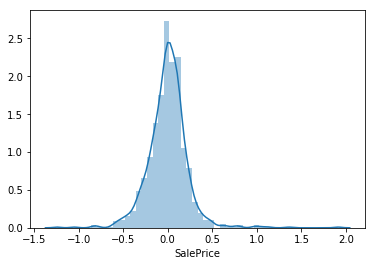

In [37]:
sns.distplot(res)

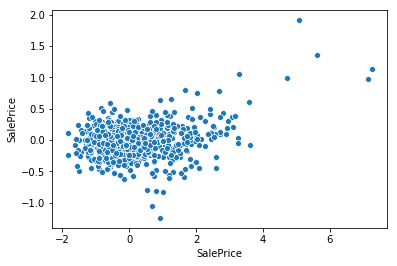

In [38]:
sns.scatterplot(y_train, res)

## There does not seem to be any visible pattern in the data and the distribution plot is also centered around 0, however the distplot has a long tail on both ends. 

# In order to tackle overfitting, we will use Ridge and Lasso regularization techniques

# Ridge regression

In [39]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [40]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


### Using Grid search cross validation, we get the value of alpha (lambda) as 50. We will use this value to regularize ridge regression

In [41]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr:', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr:', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr:', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr:', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr:', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr:', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr: 0.870066736635147
r2_test_lr: 0.8641954741840965
rss1_lr: 132.66186189551496
rss2_lr: 61.39356691419934
mse_train_lr: 0.12993326336485306
mse_test_lr: 0.13984867178633106


### The accuracy for both train and test have improved.

## Lasso regression

In [43]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [44]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


### Using Grid search cross validation, we get the value of alpha (lambda) as 0.001. We will use this value to regularize lasso regression

In [45]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9362210817746922
0.6554661399956438
65.1182755080393
155.75447475924824
0.06377891822530785
0.3547937921622967


### With alpha = 0.001, we get a good train accuracy, however, the test accuracy is still low. This can be fine-tuned by increasing the values of alpha. Here, we would be using 4 X alpha

In [47]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 4 * model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.875084166617523
0.8475762621366664
127.53906588350904
68.90666488177594
0.12491583338247703
0.15696279016349873


### This now looks like a better fit and so we are finalizing the alpha for lasso to be 0.004

# Creating a combined metric for Linear regression, Ridge and Lasso regression.

In [49]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.496532e-01,0.870067,0.875084
1,R2 Score (Test),-1.041645e+18,0.864195,0.847576
2,RSS (Train),5.140408e+01,132.661862,127.539066
3,RSS (Test),4.708995e+20,61.393567,68.906665
4,MSE (Train),2.243809e-01,0.360463,0.353434
5,MSE (Test),1.035695e+09,0.373963,0.396185


## Lets observe the changes in the coefficients after regularization

In [50]:
betas = pd.DataFrame(index=X_train.columns)

In [51]:
betas.rows = X_train.columns

In [52]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [53]:
len(lm.coef_)

245

In [54]:
pd.set_option('display.max_rows', None)
betas.head()

,Linear,Ridge,Lasso
MSSubClass,-0.018909,-0.079085,-0.079733
LotFrontage,0.003861,-0.009844,-0.004052
LotArea,0.091273,0.042487,0.041575
OverallQual,0.111832,0.219085,0.228212
OverallCond,0.079232,0.066684,0.069173


In [55]:
predictor_cols = betas[betas['Lasso'] != 0.0]
predictor_cols = predictor_cols.sort_values(by=['Lasso'])
predictor_cols['Lasso']

PoolQC_Gd              -1.069250
BsmtQual_Gd            -0.237376
KitchenQual_Gd         -0.178234
KitchenQual_TA         -0.149721
Neighborhood_Edwards   -0.140107
BsmtQual_TA            -0.121957
BsmtExposure_No        -0.088009
MSSubClass             -0.079733
ExterQual_TA           -0.068492
MSZoning_RM            -0.056405
KitchenAbvGr           -0.044879
BsmtFinType1_Unf       -0.036490
HouseStyle_2Story      -0.036073
GarageYrBlt            -0.034031
GarageFinish_RFn       -0.031417
GarageFinish_Unf       -0.028916
Neighborhood_NAmes     -0.025328
LowQualFinSF           -0.022390
BedroomAbvGr           -0.018025
YrSold                 -0.009521
Neighborhood_Mitchel   -0.007519
PoolArea               -0.007480
HeatingQC_TA           -0.006891
MoSold                 -0.004616
LotFrontage            -0.004052
OpenPorchSF            -0.003255
BsmtFinType1_BLQ        0.000976
GarageType_Attchd       0.002687
HalfBath                0.004570
BsmtHalfBath            0.006505
Foundation

In [56]:
len(predictor_cols)

65

# Summary

## Since the objective of the model building is to get all the predictor variables, we would be using Lasso regression.

## Lasso regression has an accuracy of 87.5% on train data and 84.75% on test data when alpha (lambda) = 0.004.

## Based on the model we have 65 predictors that are important and are used to predict the target variable.

<table>
    <tr><td>PoolQC_Gd</td><td>-1.069250</td></tr>
    <tr><td>Neighborhood_NoRidge</td><td>0.450275</td></tr>
    <tr><td>GrLivArea</td><td>0.307067</td></tr>
    <tr><td>Neighborhood_NridgHt</td><td>0.291969</td></tr>
    <tr><td>BsmtQual_Gd</td><td>-0.237376</td></tr>
</table>